In [ ]:
import numpy as np
import pandas as pd
import torch

np.random.seed(7)
torch.manual_seed(7)

# Generate random values
a_values = np.random.uniform(-10, 10, 500)
b_values = np.random.uniform(-10, 10, 500)
c_values = np.random.uniform(-10, 10, 500)
y_values = 5*a_values**2 + 2*b_values**2 + 4*c_values**2 + 7


df = pd.DataFrame({'a': a_values, 'b': b_values, 'c': c_values, 'y': y_values})

x = df.drop('y', axis=1).to_numpy()
y = df['y'].to_numpy().reshape(-1, 1)

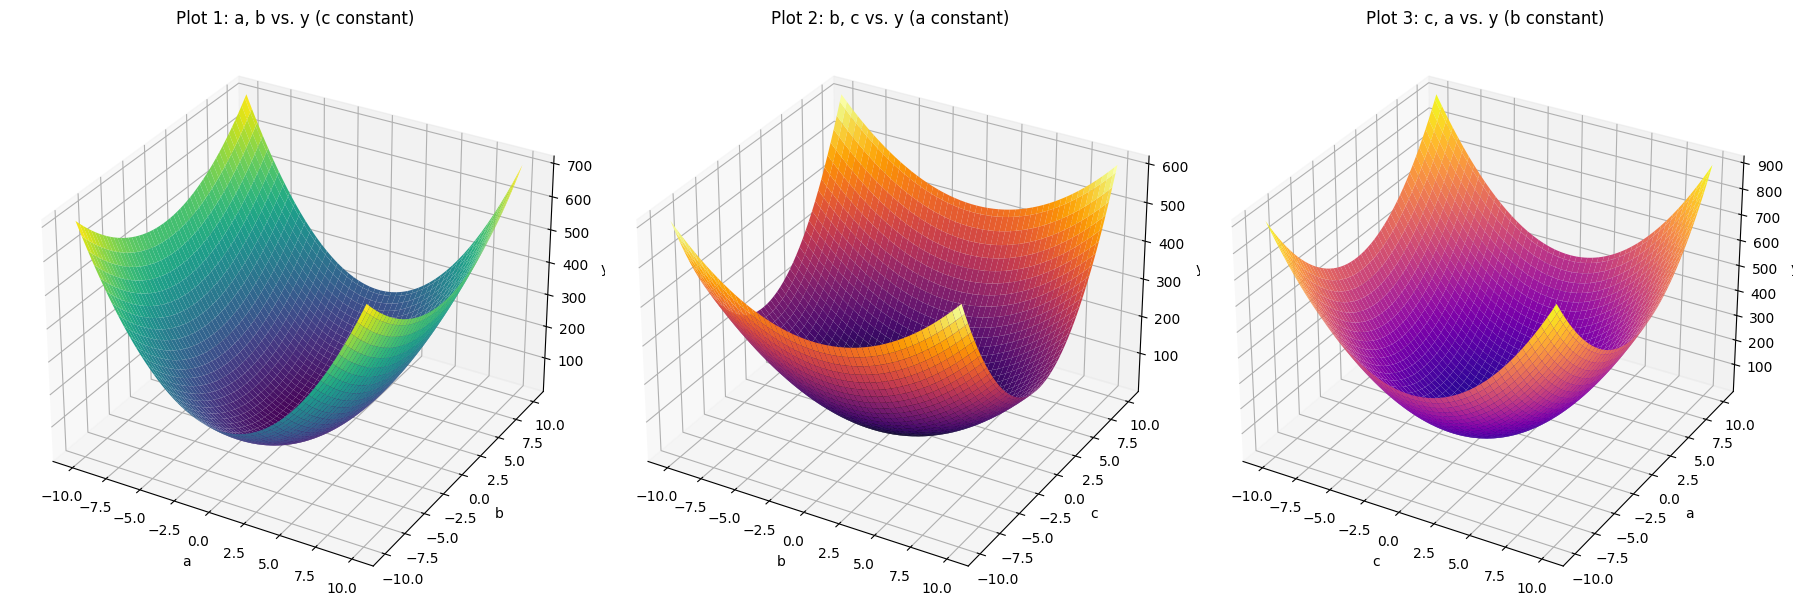

In [ ]:
# Generate a grid of values for 'a', 'b', and 'c' based on the base equation
# and plot them accordingly, keeping one variable constant in each plot.
import matplotlib.pyplot as plt

a_grid, b_grid = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x_a, x_b, x_c = x[:, 0], x[:, 1], x[:, 2]
a_median, b_median, c_median = np.median(x_a), np.median(x_b), np.median(x_c)


# Keeping 'c' constant at its median value for the first plot
c_constant = c_median
y_grid1 = 5*a_grid**2 + 2*b_grid**2 + 4*c_constant**2 + 7

fig = plt.figure(figsize=(18, 6))

# Plot 1: 'a', 'b' vs 'y' with 'c' constant
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(a_grid, b_grid, y_grid1, cmap='viridis')
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_zlabel('y')
ax1.set_title('Plot 1: a, b vs. y (c constant)')

a_median = np.median(x_a)
# Keeping 'a' constant at its median value for the second plot
a_constant = a_median
y_grid2 = 5*a_constant**2 + 2*b_grid**2 + 4*a_grid**2 + 7  # Using 'a_grid' as 'c' for variation

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(b_grid, a_grid, y_grid2, cmap='inferno')  # Swapping 'b' and 'c' roles
ax2.set_xlabel('b')
ax2.set_ylabel('c')
ax2.set_zlabel('y')
ax2.set_title('Plot 2: b, c vs. y (a constant)')

# Keeping 'b' constant at its median value for the third plot
b_constant = b_median
y_grid3 = 5*a_grid**2 + 2*b_constant**2 + 4*b_grid**2 + 7  # Using 'b_grid' as 'c' for variation

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(a_grid, b_grid, y_grid3, cmap='plasma')  # Swapping 'b' and 'c' roles again
ax3.set_xlabel('c')
ax3.set_ylabel('a')
ax3.set_zlabel('y')
ax3.set_title('Plot 3: c, a vs. y (b constant)')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

class Model(tf.keras.Model):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super(Model, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=num_hidden1, activation='relu', input_shape=(input_dim,))
        self.dense2 = tf.keras.layers.Dense(units=num_hidden2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

# MSE Loss Function
def mse_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

def MAE(y_pred, y_true):
    return tf.reduce_mean(tf.abs(y_pred - y_true))

# Function to compute gradients
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss_value = MAE(predictions, targets)
    return tape.gradient(loss_value, model.trainable_variables), loss_value

In [ ]:
# Convert numpy arrays to TensorFlow tensors
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [ ]:
model = Model(3, 20, 20)

num_epochs = 25000
lr = 0.00085  # Learning rate

for epoch in range(num_epochs):
    gradients, loss_value = grad(model, x, y)

    # Manual update of weights
    for variable, gradient in zip(model.trainable_variables, gradients):
        variable.assign_sub(lr * gradient)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss_value.numpy()}')

Epoch 0, Loss: 380.9830627441406
Epoch 100, Loss: 372.2794189453125
Epoch 200, Loss: 335.43316650390625
Epoch 300, Loss: 125.65140533447266
Epoch 400, Loss: 66.525146484375
Epoch 500, Loss: 60.46558380126953
Epoch 600, Loss: 58.663352966308594
Epoch 700, Loss: 57.36058807373047
Epoch 800, Loss: 56.38941955566406
Epoch 900, Loss: 55.51818084716797
Epoch 1000, Loss: 54.63314437866211
Epoch 1100, Loss: 53.78128433227539
Epoch 1200, Loss: 52.84451675415039
Epoch 1300, Loss: 51.849910736083984
Epoch 1400, Loss: 50.947410583496094
Epoch 1500, Loss: 50.092891693115234
Epoch 1600, Loss: 49.235965728759766
Epoch 1700, Loss: 48.36893844604492
Epoch 1800, Loss: 47.42579650878906
Epoch 1900, Loss: 46.434974670410156
Epoch 2000, Loss: 45.45779037475586
Epoch 2100, Loss: 44.41042709350586
Epoch 2200, Loss: 43.30710220336914
Epoch 2300, Loss: 42.227516174316406
Epoch 2400, Loss: 41.131980895996094
Epoch 2500, Loss: 39.949100494384766
Epoch 2600, Loss: 38.79206466674805
Epoch 2700, Loss: 37.5838317871

In [ ]:
# Prediction
y_pred = model(x)

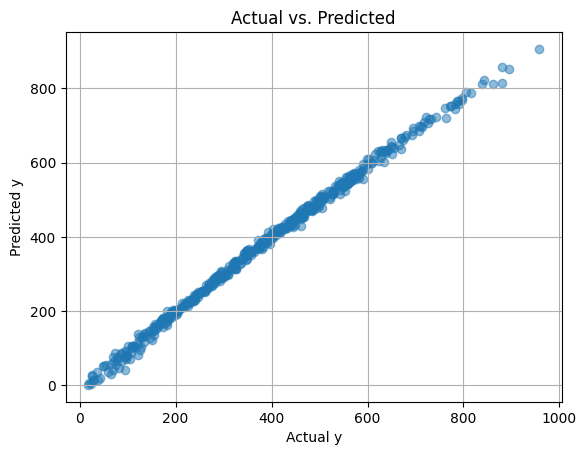

In [ ]:
# Plotting
import matplotlib.pyplot as plt

plt.scatter(y, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.grid(True)
plt.show()